In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
df = pd.read_csv("saglik_depresyon_veri.csv")

In [12]:
df.head()

,KullaniciID,Yas,Cinsiyet,UykuSuresiSaat,EgzersizSıkligiHafta,GunlukEkranSuresiSaat,IstahSeviyesi,StresSeviyesi,Nabiz,Sigara,AlkolTuketimi,MentalSaglikSkoru,DepresyonRiski
0,0489def6-5e72-42bf-9394-8cc5e7a31c77,63,Erkek,6.7,4,6.8,Az,8,93,Hayır,Az,10,Hayır
1,4278934a-8664-4548-886a-1c8e1a1c7556,59,Erkek,6.1,2,5.0,Normal,6,80,Hayır,Fazla,25,Hayır
2,937f2a6f-deea-4e7b-85eb-7d473d00e1ab,20,Kadın,6.7,4,6.3,Çok,4,86,Evet,Az,17,Hayır
3,5b47d696-ab68-4754-9d38-6e6a7b9bbbe1,27,Diğer,8.6,4,4.5,Az,6,87,Hayır,Orta,25,Hayır
4,5b6afb3b-5bc7-4289-bd8f-4c4bf34e1e38,32,Erkek,6.6,3,5.2,Az,2,60,Hayır,Hiç,24,Hayır


In [14]:
df.isnull().sum()

,0
KullaniciID,0
Yas,0
Cinsiyet,0
UykuSuresiSaat,0
EgzersizSıkligiHafta,0
GunlukEkranSuresiSaat,0
IstahSeviyesi,0
StresSeviyesi,0
Nabiz,0
Sigara,0


In [13]:
df["DepresyonRiski"].fillna(df["DepresyonRiski"].mode()[0], inplace=True)


<ipython-input-13-e91ec0372dda>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DepresyonRiski"].fillna(df["DepresyonRiski"].mode()[0], inplace=True)


In [15]:
label_columns = ["Cinsiyet", "IstahSeviyesi", "Sigara", "AlkolTuketimi", "DepresyonRiski"]
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

eden Kullanılır?
Makine öğrenmesi algoritmaları kategorik değişkenlerle doğrudan çalışamaz.

Bu yüzden bu değişkenleri sayılara çevirmek gerekir.

Label encoding en basit yöntemlerden biridir (her sınıfa bir tamsayı atanır)

In [16]:
X = df.drop(columns=["KullaniciID", "DepresyonRiski"])
y = df["DepresyonRiski"]

In [17]:
# 4. Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Özellikleri ölçekle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# 6. Modeli oluştur ve eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 7. Tahmin yap ve sonuçları değerlendir
y_pred = model.predict(X_test_scaled)
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Skoru: 1.0

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14063
           1       1.00      1.00      1.00     35937

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



Genel Doğruluk (Accuracy): 1.00
Model, 50.000 örneğin tamamını doğru tahmin etmiş.

Bu, gerçek dünyadaki veri setlerinde nadir görülen bir sonuçtur. Model çok karmaşık bir öğrenme yapısı kurmuş olabilir veya hatalı bir test yapılmış olabilir.

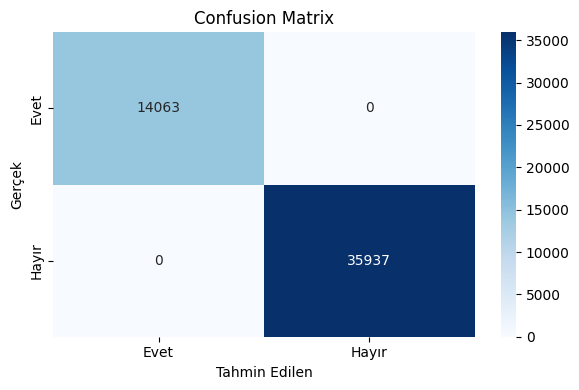

In [19]:

# 1. Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# 2. Etiketleri anlamlı hale getir
labels = label_encoders["DepresyonRiski"].classes_  # ["Hayır", "Evet"] gibi

# 3. Görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

# 1. Lojistik regresyon modelini oluştur
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Modeli eğit
log_model.fit(X_train_scaled, y_train)

# 3. Test verisiyle tahmin yap
y_pred_log = log_model.predict(X_test_scaled)

# 4. Performansı değerlendir
print("Lojistik Regresyon - Doğruluk Skoru:", accuracy_score(y_test, y_pred_log))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_log))

Lojistik Regresyon - Doğruluk Skoru: 0.85004

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72     14063
           1       0.88      0.92      0.90     35937

    accuracy                           0.85     50000
   macro avg       0.82      0.80      0.81     50000
weighted avg       0.85      0.85      0.85     50000



Modelin genel doğruluğu %85. Yani 50.000 örneğin 42.502'si doğru, 7.498'i yanlış sınıflandırılmış.

Bu, oldukça iyi bir sonuç olarak değerlendirilebilir — ama sınıf dengesine bağlı olarak tek başına yeterli değil.

In [21]:
import joblib

# Modeli kaydet
joblib.dump(log_model, "logistic_model.pkl")

# Scaler'ı da kaydet (Streamlit'te kullanmak için)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [22]:
# Özellikleri göster
try:
    print("Features listesi:", features)
except NameError:
    print("features değişkeni tanımlı değil.")

try:
    print("Scaler özellik sayısı:", scaler.n_features_in_)
except NameError:
    print("scaler değişkeni tanımlı değil.")
except AttributeError:
    print("scaler fit edilmemiş ya da n_features_in_ özelliği yok.")

try:
    print("Model özellik sayısı:", model.n_features_in_)
except NameError:
    print("model değişkeni tanımlı değil.")
except AttributeError:
    print("model n_features_in_ özelliğine sahip değil.")


features değişkeni tanımlı değil.
Scaler özellik sayısı: 11
Model özellik sayısı: 11
